In [1]:
import necstdb
import matplotlib.pyplot as plt
#from scipy.stats import norm
#from scipy.optimize import curve_fit
import numpy as np
import allantools as at
import re
from matplotlib import dates as mdates
import datetime

"hot_monitor -i 0.01 -r 10" でやってるので記録は3-4個くらいしか

In [2]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 15

In [4]:
cpu_stress = []
with open("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447/vmstat_hotmonitor_1h_20230501.log", "r") as cpu_log:
    for line in cpu_log.readlines():
        raw = re.split("[ ]+", line)
        cpu_stress.append(raw)
# freeはindexで5。

In [4]:
cpu_stress

[['2023/05/01',
  '06:34:13',
  'procs',
  '-----------memory----------',
  '---swap--',
  '-----io----',
  '-system--',
  '------cpu-----\n'],
 ['2023/05/01',
  '06:34:13',
  'r',
  'b',
  'swpd',
  'free',
  'buff',
  'cache',
  'si',
  'so',
  'bi',
  'bo',
  'in',
  'cs',
  'us',
  'sy',
  'id',
  'wa',
  'st\n'],
 ['2023/05/01',
  '06:34:13',
  '2',
  '0',
  '40624',
  '2612268',
  '1239268',
  '3675564',
  '0',
  '0',
  '39',
  '977',
  '0',
  '0',
  '6',
  '1',
  '93',
  '0',
  '0\n'],
 ['2023/05/01',
  '06:34:16',
  '1',
  '0',
  '40624',
  '2612376',
  '1239268',
  '3675224',
  '0',
  '0',
  '0',
  '10415',
  '5698',
  '14333',
  '9',
  '1',
  '90',
  '0',
  '0\n'],
 ['2023/05/01',
  '06:34:19',
  '1',
  '0',
  '40624',
  '2612568',
  '1239268',
  '3675568',
  '0',
  '0',
  '0',
  '10400',
  '5697',
  '14582',
  '8',
  '1',
  '91',
  '0',
  '0\n'],
 ['2023/05/01',
  '06:34:22',
  '1',
  '0',
  '40624',
  '2612852',
  '1239268',
  '3675340',
  '0',
  '0',
  '0',
  '10411',
  '5

In [19]:
len(cpu_stress)

1218

In [5]:
for i in range(2, len(cpu_stress), 1):
    print(cpu_stress[i][5])

2612268
2612376
2612568
2612852
2612596
2612444
2612636
2612508
2612348
2612444
2612348
2612604
2611576
2610144
2608904
2607420
2605748
2604044
2602272
2600816
2599456
2598160
2596324
2594740
2593032
2591612
2589904
2588568
2587272
2585848
2583860
2582464
2581012
2579460
2578004
2576108
2574472
2573288
2571524
2570036
2568452
2566936
2565200
2563804
2562096
2560736
2559024
2557508
2555804
2554412
2552992
2550776
2549452
2547840
2546192
2544800
2543312
2541916
2540524
2539072
2537268
2535564
2534076
2532464
2530660
2529112
2527628
2525916
2524460
2523164
2521180
2519056
2517728
2516180
2514372
2512732
2511408
2509668
2508524
2507228
2505512
2504600
2502984
2501272
2500296
2498424
2496720
2494636
2493272
2491692
2490364
2488588
2486756
2485436
2484104
2481728
2480224
2479112
2477680
2476576
2474804
2473316
2471860
2470532
2468160
2466580
2465232
2463864
2462032
2460448
2458800
2457412
2455864
2453996
2452792
2450888
2449632
2448200
2446176
2445264
2443276
2441660
2440616
2438936
2437072


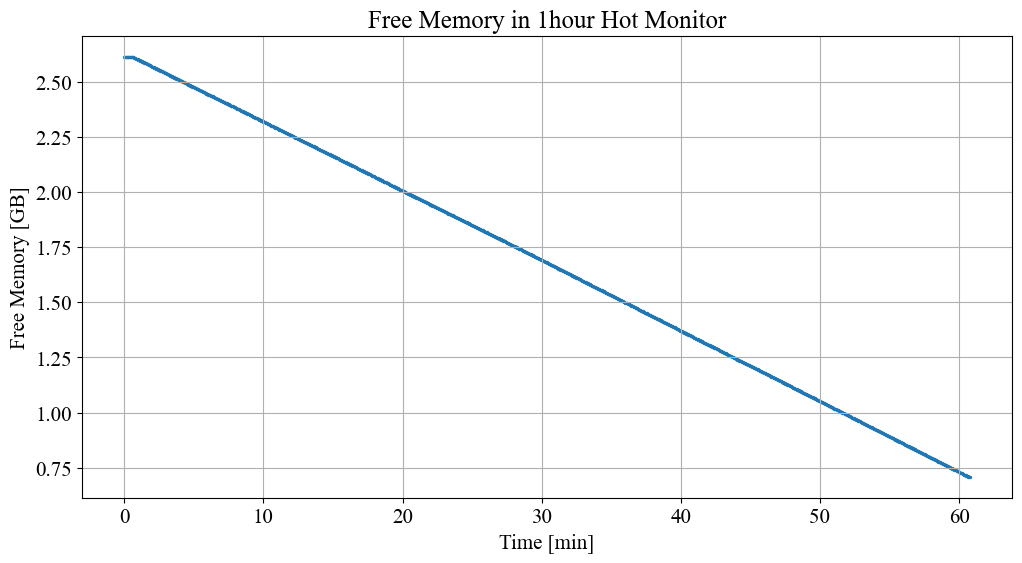

In [6]:
free_memo = [int(cpu_stress[i][5])/1e6 for i in range(2, len(cpu_stress), 1)]
time_memo = []
sformat = "%H:%M:%S"
first_time = datetime.datetime.strptime(cpu_stress[2][1], sformat).timestamp()
for i in range(2, len(cpu_stress), 1):
    time_buff = datetime.datetime.strptime(cpu_stress[i][1], sformat).timestamp()
    time_memo.append((time_buff-first_time)/60)
#time_memo = [cpu_stress[i][1] for i in range(2, len(cpu_stress), 1)]
fig = plt.figure(figsize = (12, 6))
g = plt.subplot()
g.scatter(time_memo, free_memo, s = 2.0)
g.grid(True)
g.set_xlabel("Time [min]")
g.set_ylabel("Free Memory [GB]")
g.set_title("Free Memory in 1hour Hot Monitor")
#fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
fig.savefig("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447/1hour_free_memory_log_plt.png")

In [7]:
count = 0
diff_sum = 0
for m in range(len(free_memo)-1):
    free_diff = free_memo[m+1]*1e6 - free_memo[m]*1e6
    diff_data = free_diff/3.0
    diff_sum += diff_data
    count += 1
diff_ave = diff_sum/count
print(f"{diff_ave} KBs-1")

-521.911659807956 KBs-1


In [8]:
(2.0-0.75)*1e6/(40*60)

520.8333333333334

In [9]:
(1.92*1e6)/(60*60)

533.3333333333334

In [3]:
db = necstdb.opendb("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447")
db.list_tables()

['necst-OMU1P85M-ctrl-antenna-actual_speed',
 'necst-OMU1P85M-ctrl-antenna-actual_step',
 'necst-OMU1P85M-ctrl-antenna-altaz',
 'necst-OMU1P85M-ctrl-antenna-controlled',
 'necst-OMU1P85M-ctrl-antenna-encoder',
 'necst-OMU1P85M-ctrl-antenna-speed',
 'necst-OMU1P85M-ctrl-calib-chopper_cmd',
 'necst-OMU1P85M-ctrl-calib-chopper_status',
 'necst-OMU1P85M-data-spectral-board1',
 'necst-OMU1P85M-data-spectral-board2',
 'necst-OMU1P85M-data-spectral-board3',
 'necst-OMU1P85M-data-spectral-board4',
 'necst-OMU1P85M-rx-qlook_meta',
 'necst-OMU1P85M-rx-quick_spectra-board1',
 'necst-OMU1P85M-rx-quick_spectra-board2',
 'necst-OMU1P85M-rx-quick_spectra-board3',
 'necst-OMU1P85M-rx-quick_spectra-board4',
 'necst-OMU1P85M-rx-spectra_meta',
 'necst-OMU1P85M-rx-spectra_record',
 'necst-OMU1P85M-weather-ambient',
 'parameter_events',
 'rosout']

In [11]:
db.get_info()

file size [byte]  #records  \
table name                                                             
necst-OMU1P85M-ctrl-antenna-actual_speed           1140032     35626   
necst-OMU1P85M-ctrl-antenna-actual_step            1127232     35226   
necst-OMU1P85M-ctrl-antenna-altaz                  7081840    177046   
necst-OMU1P85M-ctrl-antenna-controlled              302820      3605   
necst-OMU1P85M-ctrl-antenna-encoder                1750120     43753   
necst-OMU1P85M-ctrl-antenna-speed                  5508896    172153   
necst-OMU1P85M-ctrl-calib-chopper_cmd                   34         2   
necst-OMU1P85M-ctrl-calib-chopper_status             61251      3603   
necst-OMU1P85M-data-spectral-board1              472556480      3604   
necst-OMU1P85M-data-spectral-board2              472556480      3604   
necst-OMU1P85M-data-spectral-board3              472556480      3604   
necst-OMU1P85M-data-spectral-board4              472556480      3604   
necst-OMU1P85M-rx-qlook_meta                           104         1   
necst-OMU1P85M-rx-quick_spectra-board1             1816416      3604   
necst-OMU1P85M-rx-quick_spectra-board2             1816416      3604   
necst-OMU1P85M-rx-quick_spectra-board3             1816416      3604   
necst-OMU1P85M-rx-quick_spectra-board4             1816416      3604   
necst-OMU1P85M-rx-spectra_meta                         208         2   
necst-OMU1P85M-rx-spectra_record                        20         1   
necst-OMU1P85M-weather-ambient                      144160      3604   
parameter_events                                        38         1   
rosout                                             3059490     17997   

                                          record size [byte]  \
table name                                                     
necst-OMU1P85M-ctrl-antenna-actual_speed                  32   
necst-OMU1P85M-ctrl-antenna-actual_step                   32   
necst-OMU1P85M-ctrl-antenna-altaz                         40   
necst-OMU1P85M-ctrl-antenna-controlled                    84   
necst-OMU1P85M-ctrl-antenna-encoder                       40   
necst-OMU1P85M-ctrl-antenna-speed                         32   
necst-OMU1P85M-ctrl-calib-chopper_cmd                     17   
necst-OMU1P85M-ctrl-calib-chopper_status                  17   
necst-OMU1P85M-data-spectral-board1                   131120   
necst-OMU1P85M-data-spectral-board2                   131120   
necst-OMU1P85M-data-spectral-board3                   131120   
necst-OMU1P85M-data-spectral-board4                   131120   
necst-OMU1P85M-rx-qlook_meta                             104   
necst-OMU1P85M-rx-quick_spectra-board1                   504   
necst-OMU1P85M-rx-quick_spectra-board2                   504   
necst-OMU1P85M-rx-quick_spectra-board3                   504   
necst-OMU1P85M-rx-quick_spectra-board4                   504   
necst-OMU1P85M-rx-spectra_meta                           104   
necst-OMU1P85M-rx-spectra_record                          20   
necst-OMU1P85M-weather-ambient                            40   
parameter_events                                          38   
rosout                                                   170   

                                                           format  
table name                                                         
necst-OMU1P85M-ctrl-antenna-actual_speed                    <dddd  
necst-OMU1P85M-ctrl-antenna-actual_step                     <dqqd  
necst-OMU1P85M-ctrl-antenna-altaz                     <ddd3s5sd0s  
necst-OMU1P85M-ctrl-antenna-controlled                 <d???64s?d  
necst-OMU1P85M-ctrl-antenna-encoder                   <ddd3s5sd0s  
necst-OMU1P85M-ctrl-antenna-speed                           <dddd  
necst-OMU1P85M-ctrl-calib-chopper_cmd                        <d?d  
necst-OMU1P85M-ctrl-calib-chopper_status                     <d?d  
necst-OMU1P85M-data-spectral-board1       <d32768f8s16sd0i0d0d0dd  
necst-OMU1P85M-data-spectral

In [12]:
weather = db.open_table("necst-OMU1P85M-weather-ambient").read(astype = 'sa')

In [13]:
data_b3 = db.open_table("necst-OMU1P85M-data-spectral-board3").read(astype = 'sa')
data_b3

array([(1.68292289e+09, [1.24060477e+10, 1.24060477e+10, 1.24060477e+10, 1.24060477e+10, 1.24060477e+10, 3.34582477e+09, 7.15351040e+09, 2.45865431e+10, 2.36355558e+09, 3.86210560e+09, 1.22755256e+10, 3.33547909e+10, 4.47940362e+10, 2.28818432e+09, 7.53758566e+09, 5.58254438e+09, 1.96591987e+09, 3.65857997e+09, 3.43147494e+09, 8.33171610e+09, 1.10027602e+10, 1.93465152e+09, 2.60969293e+09, 1.64503155e+09, 3.76671974e+09, 1.98091750e+09, 1.56245901e+09, 1.64395930e+10, 7.46049536e+09, 1.46614656e+09, 3.87898701e+09, 2.49093555e+09, 1.47398170e+09, 2.03331789e+09, 2.01626816e+09, 6.55459994e+09, 7.11278234e+09, 1.85813056e+09, 1.49185562e+09, 2.30961664e+09, 1.37160154e+09, 1.36614758e+09, 5.11466240e+09, 1.40576934e+09, 6.14766029e+09, 1.35777946e+09, 2.24911283e+09, 1.33735987e+09, 1.29132493e+09, 1.70126323e+09, 1.26796122e+09, 7.20310272e+09, 1.58339482e+09, 1.79473664e+09, 3.17877248e+09, 1.95218342e+09, 1.35774285e+09, 2.21364326e+09, 1.33655514e+09, 1.72539046e+09, 4.31628493e+09,

1.308216241488278e-06 0.0011437728102592218


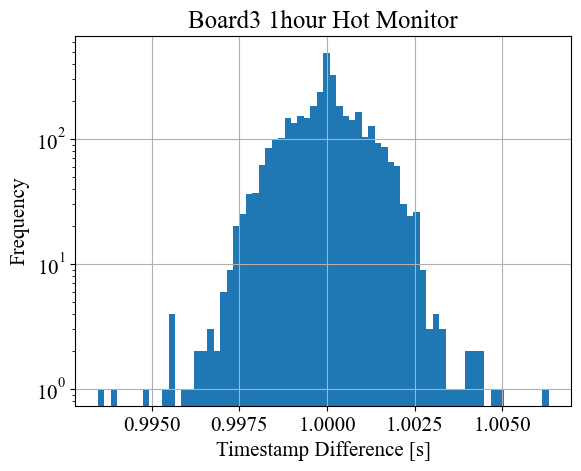

In [16]:
data_sub = []
time_data = data_b3["time"]
for i in range(len(time_data)-1):
    buff = time_data[i+1] - time_data[i]
    data_sub.append(buff)

#def func(x, a, mu, sigma):
    #return a*np.exp(-(x-mu)**2/(2*sigma**2))

#hist_1, bins = np.histogram(data_sub, bins = 50)
#bins = bins[:-1]
#p0_ini = [900, 1.0, 0.01]
#popt, pcov = curve_fit(func, bins, hist_1, p0 = p0_ini)
#fit_re = func(bins, popt[0], popt[1], popt[2])

fig, ax = plt.subplots()
#ax.plot(bins, fit_re)
ax.hist(data_sub, bins = 70)
ax.set_xlabel("Timestamp Difference [s]")
ax.set_ylabel("Frequency")
ax.set_title("Board3 1hour Hot Monitor")
ax.set_yscale('log')
ax.grid(True)
fig.savefig("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447/time_diff_b3_0501_1h.png")

var_time3 = np.var(data_sub)
std_time3 = np.std(data_sub)
print(var_time3, std_time3)

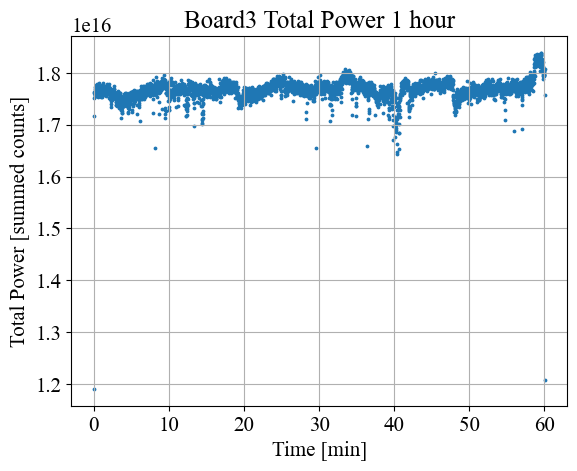

In [18]:
time_data = data_b3["time"]
spec_data = data_b3["data"]
totpow = []
for i in range(spec_data.shape[0]):
    totpow.append(sum(spec_data[i]))

time_spend = []
for i in time_data:
    time_spend.append((i - time_data[0])/60.0)

fig_2, ax_2 = plt.subplots()
ax_2.scatter(time_spend, totpow, s = 3)
ax_2.set_xlabel("Time [min]")
ax_2.set_ylabel("Total Power [summed counts]")
ax_2.set_title("Board3 Total Power 1 hour")
ax_2.grid(True)
fig_2.savefig("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447/totpow_b3_0501_1h.pdf")

多分端っこはHotが出し入れされてて落ちてる

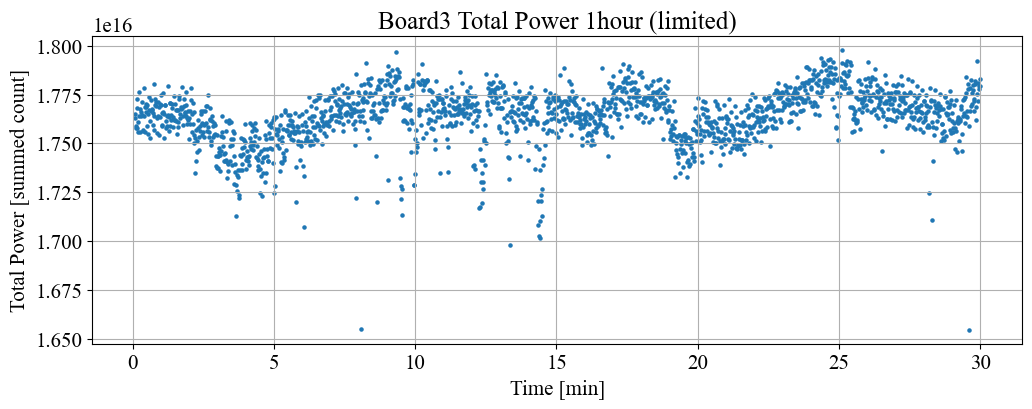

In [19]:
time_data = data_b3["time"]
spec_data = data_b3["data"]
totpow_sub = []
time_sub = []
for i in range(spec_data.shape[0]):
    if (i > 3) & (i<1801):
        totpow_sub.append(sum(spec_data[i]))
        time_sub.append(time_data[i])
    else:
        continue

time_spend = []
for i in time_sub:
    time_spend.append((i - time_data[0])/60.0)

fig_3, ax_3 = plt.subplots(figsize = (12.0, 4.0))
ax_3.scatter(time_spend, totpow_sub, s = 5)
ax_3.set_xlabel("Time [min]")
ax_3.set_ylabel("Total Power [summed count]")
ax_3.set_title("Board3 Total Power 1hour (limited)")
ax_3.grid(True)
fig_3.savefig("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447/totpow_lim_b3_0501_1h.pdf")

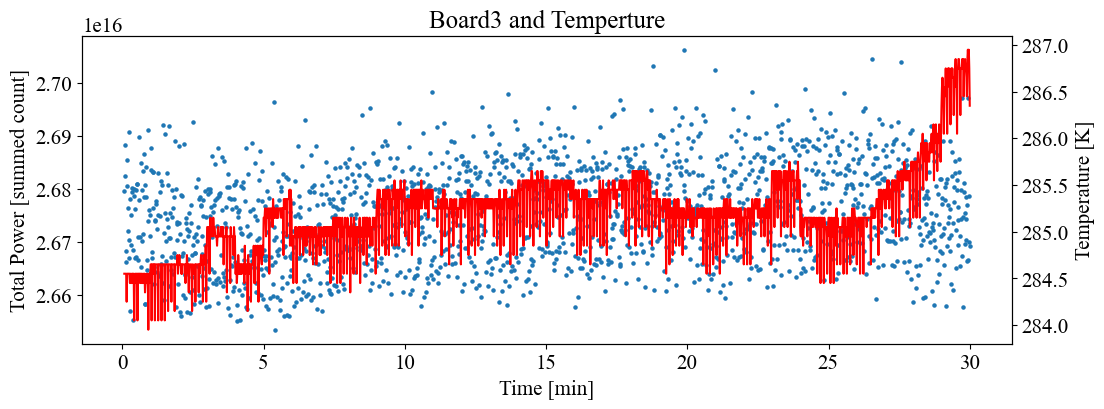

In [75]:
time_data = weather["time"]
tmp_data = weather["temperature"]
tmp_sub = []
time_sub = []
for i in range(tmp_data.shape[0]):
    if (i > 3) & (i<1801):
        tmp_sub.append(tmp_data[i])
        time_sub.append(time_data[i])
    else:
        continue

time_spend = []
for i in time_sub:
    time_spend.append((i - time_data[0])/60.0)

fig = plt.figure(figsize = (12.0, 4.0))
ax1 = fig.add_subplot(111)
ax1.scatter(time_spend, totpow_sub, s = 5.0)
ax2 = ax1.twinx()
ax2.plot(time_spend, tmp_sub, color = "red")
ax1.set_ylabel("Total Power [summed count]")
ax1.set_xlabel("Time [min]")
ax2.set_ylabel("Temperature [K]")
ax1.set_title("Board3 and Temperture")
fig.savefig("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447/totpow_b3_v_tmp_0501_1h.pdf")

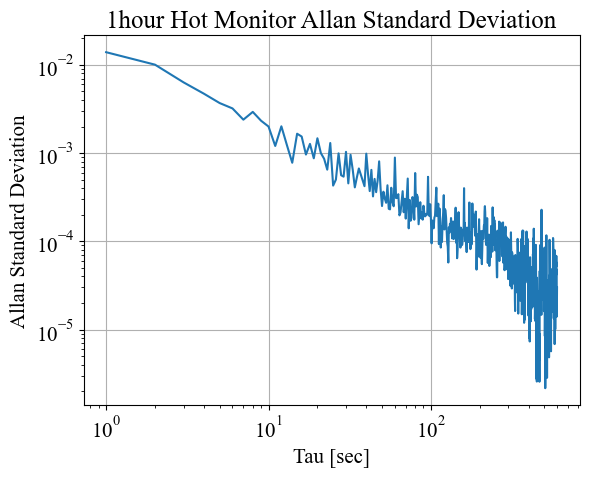

In [37]:
time_data = data_b3["time"]
spec_data = data_b3["data"]
totpow_sub = []
time_sub = []
for i in range(spec_data.shape[0]):
    if (i > 3) & (i<1801):
        totpow_sub.append(sum(spec_data[i])/1e16)
        time_sub.append(time_data[i])
    else:
        continue

(tau, var, err, num) = at.adev(data = totpow_sub, rate = 1.0, data_type="phase", taus = 'all')
plt.plot(tau, var)
#plt.errorbar(tau, var, yerr = err, capsize = 5.0)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Tau [sec]")
plt.ylabel("Allan Standard Deviation")
plt.title("1hour Hot Monitor Allan Standard Deviation")
plt.grid(True)
plt.savefig("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447/AllanDev_scale1e16.png")

[ 79534.93426316 -84747.57597174  86029.11822978 ...  76082.90275052
  12536.97881592   9731.58920458]


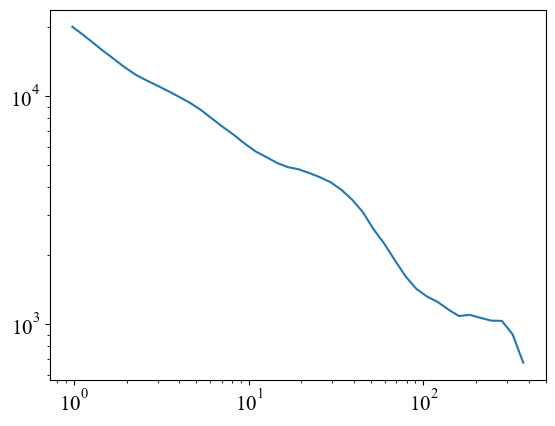

In [34]:
t = np.logspace(0, 3, 50)  # tau values from 1 to 1000
y = at.noise.white(10000)*1e5  # Generate some frequency data
r = 12.3  # sample rate in Hz of the input data
(t2, ad, ade, adn) = at.oadev(y, rate=r, data_type="freq", taus=t)  # Compute the overlapping ADEV
fig = plt.loglog(t2, ad) 
print(y)

In [21]:
totpow_sub

[1.7631342454882816e+16,
 1.7648080482768896e+16,
 1.7577225723412096e+16,
 1.7590423909472e+16,
 1.7578638056497792e+16,
 1.7683267710461696e+16,
 1.7729221835069696e+16,
 1.756001270855808e+16,
 1.7609453630178944e+16,
 1.7637627646995456e+16,
 1.7762724994115456e+16,
 1.7674870374608384e+16,
 1.7558881710987264e+16,
 1.763870251335488e+16,
 1.7662184093220992e+16,
 1.7712526863960832e+16,
 1.7643766691087872e+16,
 1.7568378177389696e+16,
 1.7563451229122688e+16,
 1.7640262654950528e+16,
 1.7785324588973824e+16,
 1.7684711844980864e+16,
 1.7557027625179392e+16,
 1.76880178859264e+16,
 1.7659025831328512e+16,
 1.7699069622149248e+16,
 1.7693984830038912e+16,
 1.758975154792064e+16,
 1.754785252944704e+16,
 1.7648850330539136e+16,
 1.7737353364978432e+16,
 1.7668838477151872e+16,
 1.7526046198917888e+16,
 1.7612980281871232e+16,
 1.7664698395972864e+16,
 1.7724335783000192e+16,
 1.7675301901447552e+16,
 1.767158174975296e+16,
 1.7595631539651584e+16,
 1.7654554720784512e+16,
 1.7806392

In [17]:
np.count_nonzero(np.isnan(data_b3["data"]))

0

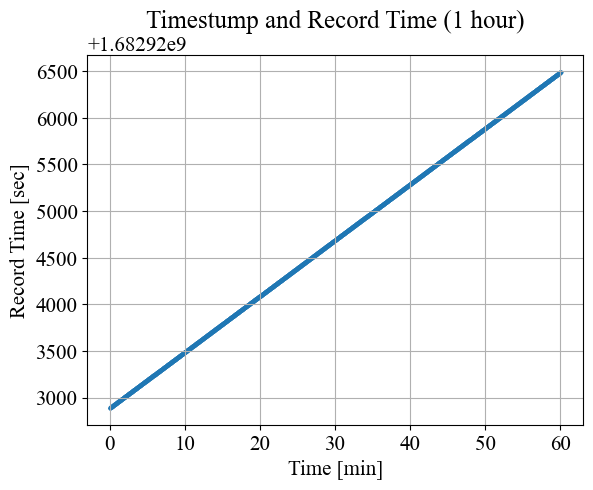

In [14]:
time_data = data_b3["time"]
record_data = data_b3["recorded_time"]

record_spend = []
time_spend = []
for i in time_data:
    time_spend.append((i - time_data[0])/60.0)

for i in record_data:
    record_spend.append((i - record_data[0])/60.0)

fig_2, ax_2 = plt.subplots()
ax_2.scatter(time_spend, record_data, s = 3)
ax_2.set_xlabel("Time [min]")
ax_2.set_ylabel("Record Time [sec]")
ax_2.set_title("Timestump and Record Time (1 hour)")
ax_2.grid(True)
fig_2.savefig("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447/time_recordedtime_plot_1hour.png")

In [14]:
np.count_nonzero(np.isnan(data_b3["data"]))

0

In [12]:
data_b4 = db.open_table("necst-OMU1P85M-data-spectral-board4").read(astype = 'sa')
data_b4

array([(1.68292289e+09, [1.42470533e+10, 1.42470533e+10, 1.42470533e+10, 1.42470533e+10, 1.42470533e+10, 2.36164429e+09, 5.75019930e+09, 2.27535503e+10, 2.23950976e+09, 4.01864704e+09, 9.23181261e+09, 3.08465254e+10, 4.06512845e+10, 2.45386547e+09, 7.29621504e+09, 5.22998835e+09, 1.90012877e+09, 3.76077773e+09, 3.16162432e+09, 6.54028544e+09, 1.02432870e+10, 2.03593690e+09, 2.29373005e+09, 1.59492224e+09, 3.62338790e+09, 1.85168678e+09, 1.62292250e+09, 1.48745533e+10, 6.73317734e+09, 1.50073843e+09, 3.73818778e+09, 2.38518323e+09, 1.52496141e+09, 1.86389965e+09, 2.14878438e+09, 6.28863130e+09, 6.53096243e+09, 1.62147520e+09, 1.37383821e+09, 2.29554867e+09, 1.29482650e+09, 1.31279040e+09, 4.69859738e+09, 1.44334938e+09, 5.99591885e+09, 1.32151194e+09, 1.80647949e+09, 1.27071603e+09, 1.22629901e+09, 1.44357773e+09, 1.28618266e+09, 6.38033357e+09, 1.72788083e+09, 1.64696909e+09, 2.80235725e+09, 1.83300378e+09, 1.30159923e+09, 2.43803622e+09, 1.32303718e+09, 1.61926272e+09, 3.67043200e+09,

3.566958446654545e-07 0.0005972401900956218


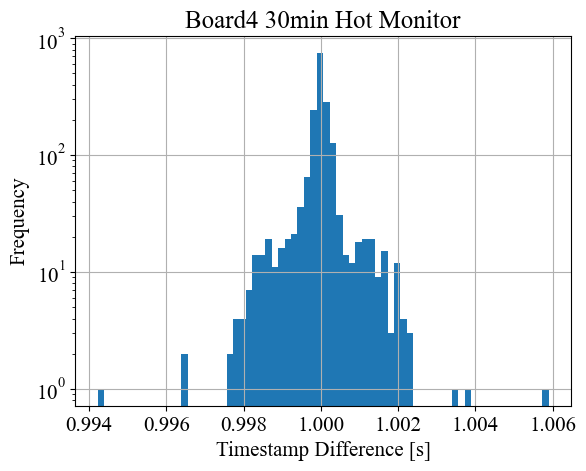

In [78]:
data_sub = []
time_data = data_b4["time"]
for i in range(len(time_data)-1):
    buff = time_data[i+1] - time_data[i]
    data_sub.append(buff)
fig, ax = plt.subplots()
ax.hist(data_sub, bins = 70)
ax.set_xlabel("Timestamp Difference [s]")
ax.set_ylabel("Frequency")
ax.set_title("Board4 30min Hot Monitor")
ax.grid(True)
ax.set_yscale('log')
fig.savefig("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447/time_diff_b4_0501_1h.pdf")
var_time3 = np.var(data_sub)
std_time3 = np.std(data_sub)
print(var_time3, std_time3)

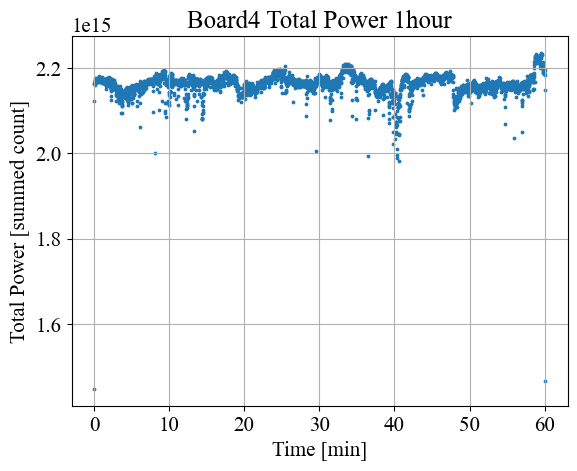

In [16]:
time_data = data_b4["time"]
spec_data = data_b4["data"]
totpow = []
for i in range(spec_data.shape[0]):
    totpow.append(sum(spec_data[i]))

time_spend = []
for i in time_data:
    time_spend.append((i - time_data[0])/60.0)

fig_2, ax_2 = plt.subplots()
ax_2.scatter(time_spend, totpow, s = 3)
ax_2.set_xlabel("Time [min]")
ax_2.set_ylabel("Total Power [summed count]")
ax_2.set_title("Board4 Total Power 1hour")
ax_2.grid(True)
fig_2.savefig("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447/totpow_b4_0501_1h.pdf")

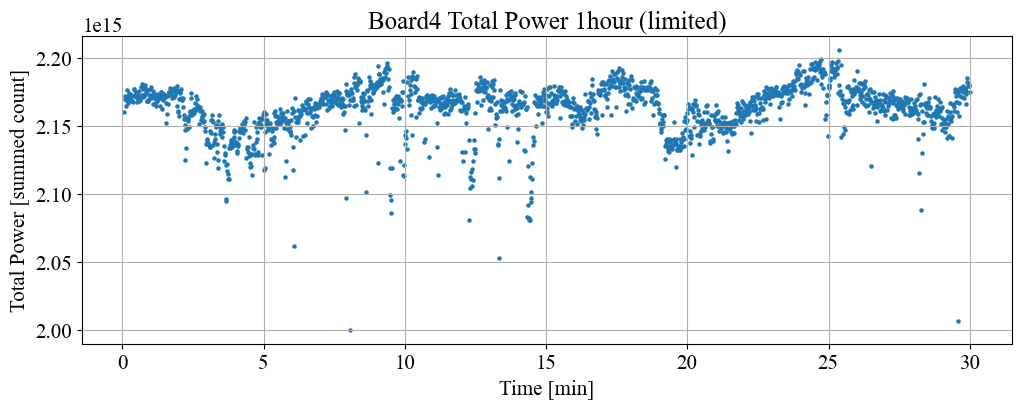

In [15]:
time_data = data_b4["time"]
spec_data = data_b4["data"]
totpow_sub = []
time_sub = []
for i in range(spec_data.shape[0]):
    if (i > 3) & (i<1801):
        totpow_sub.append(sum(spec_data[i]))
        time_sub.append(time_data[i])
    else:
        continue

time_spend = []
for i in time_sub:
    time_spend.append((i - time_data[0])/60.0)

fig_3, ax_3 = plt.subplots(figsize = (12.0, 4.0))
ax_3.scatter(time_spend, totpow_sub, s = 5)
ax_3.set_xlabel("Time [min]")
ax_3.set_ylabel("Total Power [summed count]")
ax_3.set_title("Board4 Total Power 1hour (limited)")
ax_3.grid(True)
fig_3.savefig("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447/totpow_lim_b4_0501_1h.pdf")

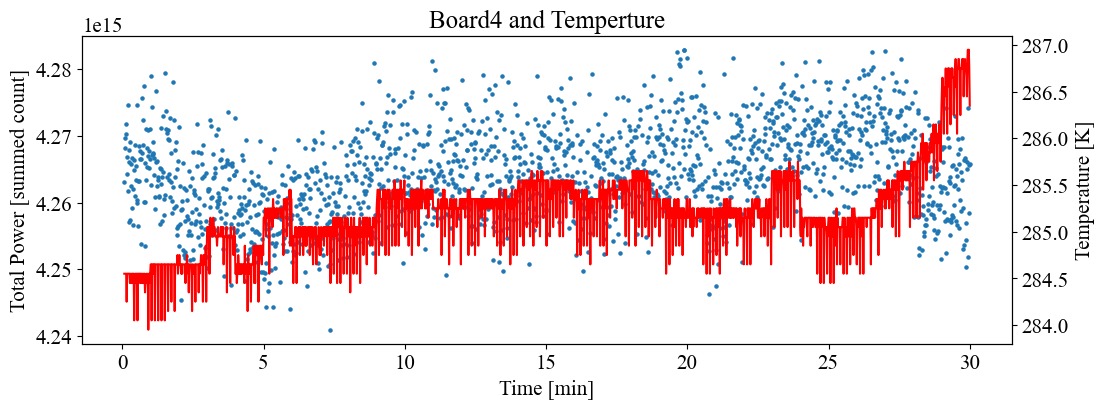

In [81]:
time_data = weather["time"]
tmp_data = weather["temperature"]
tmp_sub = []
time_sub = []
for i in range(tmp_data.shape[0]):
    if (i > 3) & (i<1801):
        tmp_sub.append(tmp_data[i])
        time_sub.append(time_data[i])
    else:
        continue

time_spend = []
for i in time_sub:
    time_spend.append((i - time_data[0])/60.0)

fig = plt.figure(figsize = (12.0, 4.0))
ax1 = fig.add_subplot(111)
ax1.scatter(time_spend, totpow_sub, s = 5.0)
ax2 = ax1.twinx()
ax2.plot(time_spend, tmp_sub, color = "red")
ax1.set_ylabel("Total Power [summmed count]")
ax1.set_xlabel("Time [min]")
ax2.set_ylabel("Temperature [K]")
ax1.set_title("Board4 and Temperture")
fig.savefig("/Users/ishikawatatsumi/Desktop/Data/1p85m/necst_hotmonitor_20230501_063447/totpow_b4_v_tmp_0501_1h.pdf")

In [4]:
sg_1st = db.open_table("necst-OMU1P85M-rx-lo_signal-band6_1st").read(astype = 'sa')
sg_2lsb = db.open_table("necst-OMU1P85M-rx-lo_signal-band6_lsb_2nd").read(astype = 'sa')
sg_2usb = db.open_table("necst-OMU1P85M-rx-lo_signal-band6_usb_2nd").read(astype = 'sa')

Exception: Table 'necst-OMU1P85M-rx-lo_signal-band6_1st' does not exist.

In [4]:
sis_lsb = db.open_table("necst-OMU1P85M-rx-sis_bias-LSB").read(astype = 'sa')

Exception: Table 'necst-OMU1P85M-rx-sis_bias-LSB' does not exist.